In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df=pd.read_csv("FIFA.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 
                     'Club Logo', 'Real Face', 'Jersey Number', 
                     'Loaned From', 'Contract Valid Until', 'Release Clause'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 79 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      16654 non-null object
Height                      18159 non-null

In [6]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Joined                      1553
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
          

In [7]:
null_columns=df.columns[df.isnull().any()]
print(null_columns)

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [8]:
df[['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].replace('', np.nan, inplace=True)

In [9]:
#Remove the Row where the value is Nan
df.dropna(subset=['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 79 columns):
Name                        14751 non-null object
Age                         14751 non-null int64
Nationality                 14751 non-null object
Overall                     14751 non-null int64
Potential                   14751 non-null int64
Club                        14751 non-null object
Value                       14751 non-null object
Wage                        14751 non-null object
Special                     14751 non-null int64
Preferred Foot              14751 non-null object
International Reputation    14751 non-null float64
Weak Foot                   14751 non-null float64
Skill Moves                 14751 non-null float64
Work Rate                   14751 non-null object
Body Type                   14751 non-null object
Position                    14751 non-null object
Joined                      14751 non-null object
Height                      14751 non-null

In [11]:
# Drop the column which are of no use
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 53 columns):
Name                        14751 non-null object
Age                         14751 non-null int64
Nationality                 14751 non-null object
Overall                     14751 non-null int64
Potential                   14751 non-null int64
Club                        14751 non-null object
Value                       14751 non-null object
Wage                        14751 non-null object
Special                     14751 non-null int64
Preferred Foot              14751 non-null object
International Reputation    14751 non-null float64
Weak Foot                   14751 non-null float64
Skill Moves                 14751 non-null float64
Work Rate                   14751 non-null object
Body Type                   14751 non-null object
Position                    14751 non-null object
Joined                      14751 non-null object
Height                      14751 non-null

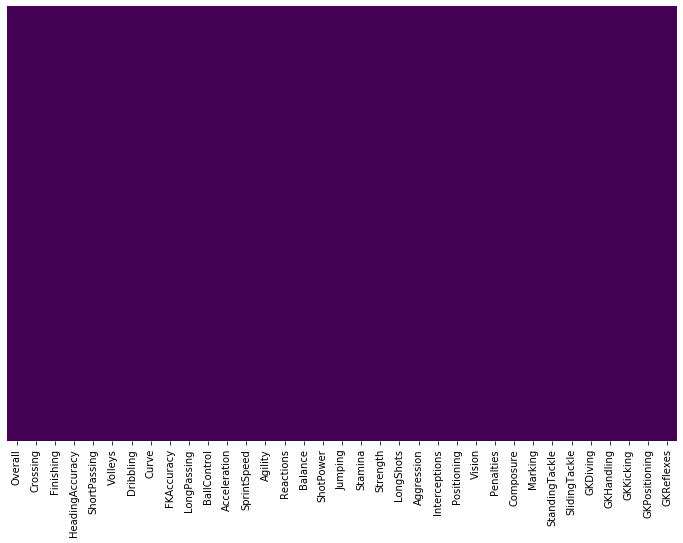

In [13]:
# To Get the Heat map 
plt.figure(figsize=(12,8))
sns.heatmap(df[['Overall', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [14]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = df.drop(columns=['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Joined', 'Height', 'Weight'], axis=1)

In [15]:
# To get the object type of particular datatype
df.select_dtypes(include='float').columns

Index(['International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Multple Linear Regression

In [16]:
# For getting the corealation matrix to take the overall performance
df.corr()['Overall'].sort_values(ascending=False)

Overall                     1.000000
Reactions                   0.851576
Composure                   0.806372
Special                     0.799473
ShortPassing                0.726746
BallControl                 0.722560
Potential                   0.653456
LongPassing                 0.592894
ShotPower                   0.565339
Vision                      0.530021
Dribbling                   0.518126
Skill Moves                 0.506625
International Reputation    0.505888
Curve                       0.504522
LongShots                   0.503088
Crossing                    0.501262
HeadingAccuracy             0.473380
Stamina                     0.467991
Aggression                  0.464158
Age                         0.463233
FKAccuracy                  0.459281
Volleys                     0.450665
Positioning                 0.440587
Penalties                   0.393219
Finishing                   0.374637
Strength                    0.348397
Interceptions               0.345273
M

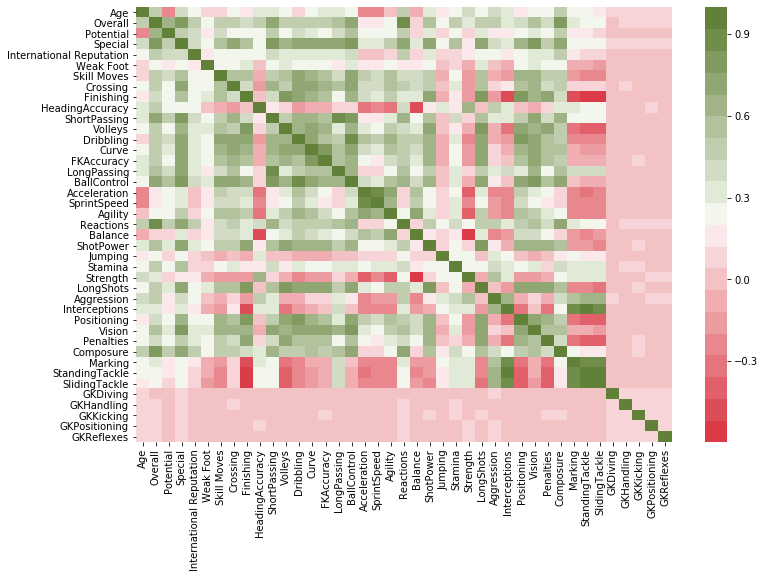

In [17]:
# as we can see in the graph below there are plenty of properties that correlate. 
# In order to avoid collinearity we have to exclude one from correlating pair 
# (except when high (>.8) correlation appears with target feature this case 'Overall')
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(10, 110, n=20))
plt.show()

## Step_3: Splitting the Data for Training and Testing


In [18]:
# Putting feature variable to X
X = df.drop(['Overall','Position'],axis=1)
# Putting response variable to y
y = df.Overall

In [19]:
# Random state is the seed used by  the random number generator. It can be any interger
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=.70 , random_state=40)

## Step_4 : Performing Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression

In [22]:
# Fit the model 
lr1=LinearRegression().fit(X_train,y_train)

## Step_5 : Model Evaluation

In [23]:
# Print the intercept
print(lr1.intercept_)

-13.906557209011225


In [24]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lr1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.504037
Potential,0.480688
Special,0.047991
International Reputation,0.428496
Weak Foot,0.011870
Skill Moves,0.802611
Crossing,-0.038557
Finishing,-0.029738
HeadingAccuracy,-0.000598
ShortPassing,0.008571


## Step_6 : Predictions

In [25]:
# Making Prediction using model
y_pred = lr1.predict(X_test)

## Step_7: Calculating Error Terms

In [26]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [27]:
print("Value of the mean square value is ",mse)
print("Value of the r Square is ", r_squared)

Value of the mean square value is  3.2346406453819148
Value of the r Square is  0.930513666493806


## Optional Step : Checking for P-value Using STATSMODELS

In [28]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X_train_sm = sm.add_constant(X_train_sm)
# create a fitting model in one time
lm_1=sm.OLS(y_train,X_train_sm).fit()

In [29]:
# print the coefficients 
lm_1.params

const                      -13.906557
Age                          0.504037
Potential                    0.480688
Special                      0.047991
International Reputation     0.428496
Weak Foot                    0.011870
Skill Moves                  0.802611
Crossing                    -0.038557
Finishing                   -0.029738
HeadingAccuracy             -0.000598
ShortPassing                 0.008571
Volleys                     -0.054779
Dribbling                   -0.054069
Curve                       -0.052036
FKAccuracy                  -0.044544
LongPassing                 -0.049890
BallControl                  0.035802
Acceleration                -0.021142
SprintSpeed                 -0.015208
Agility                     -0.042519
Reactions                    0.095996
Balance                     -0.063089
ShotPower                   -0.035684
Jumping                     -0.047129
Stamina                     -0.016717
Strength                    -0.010001
LongShots   

In [30]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3456.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:56:53   Log-Likelihood:                -20836.
No. Observations:               10325   AIC:                         4.175e+04
Df Residuals:                   10284   BIC:                         4.205e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

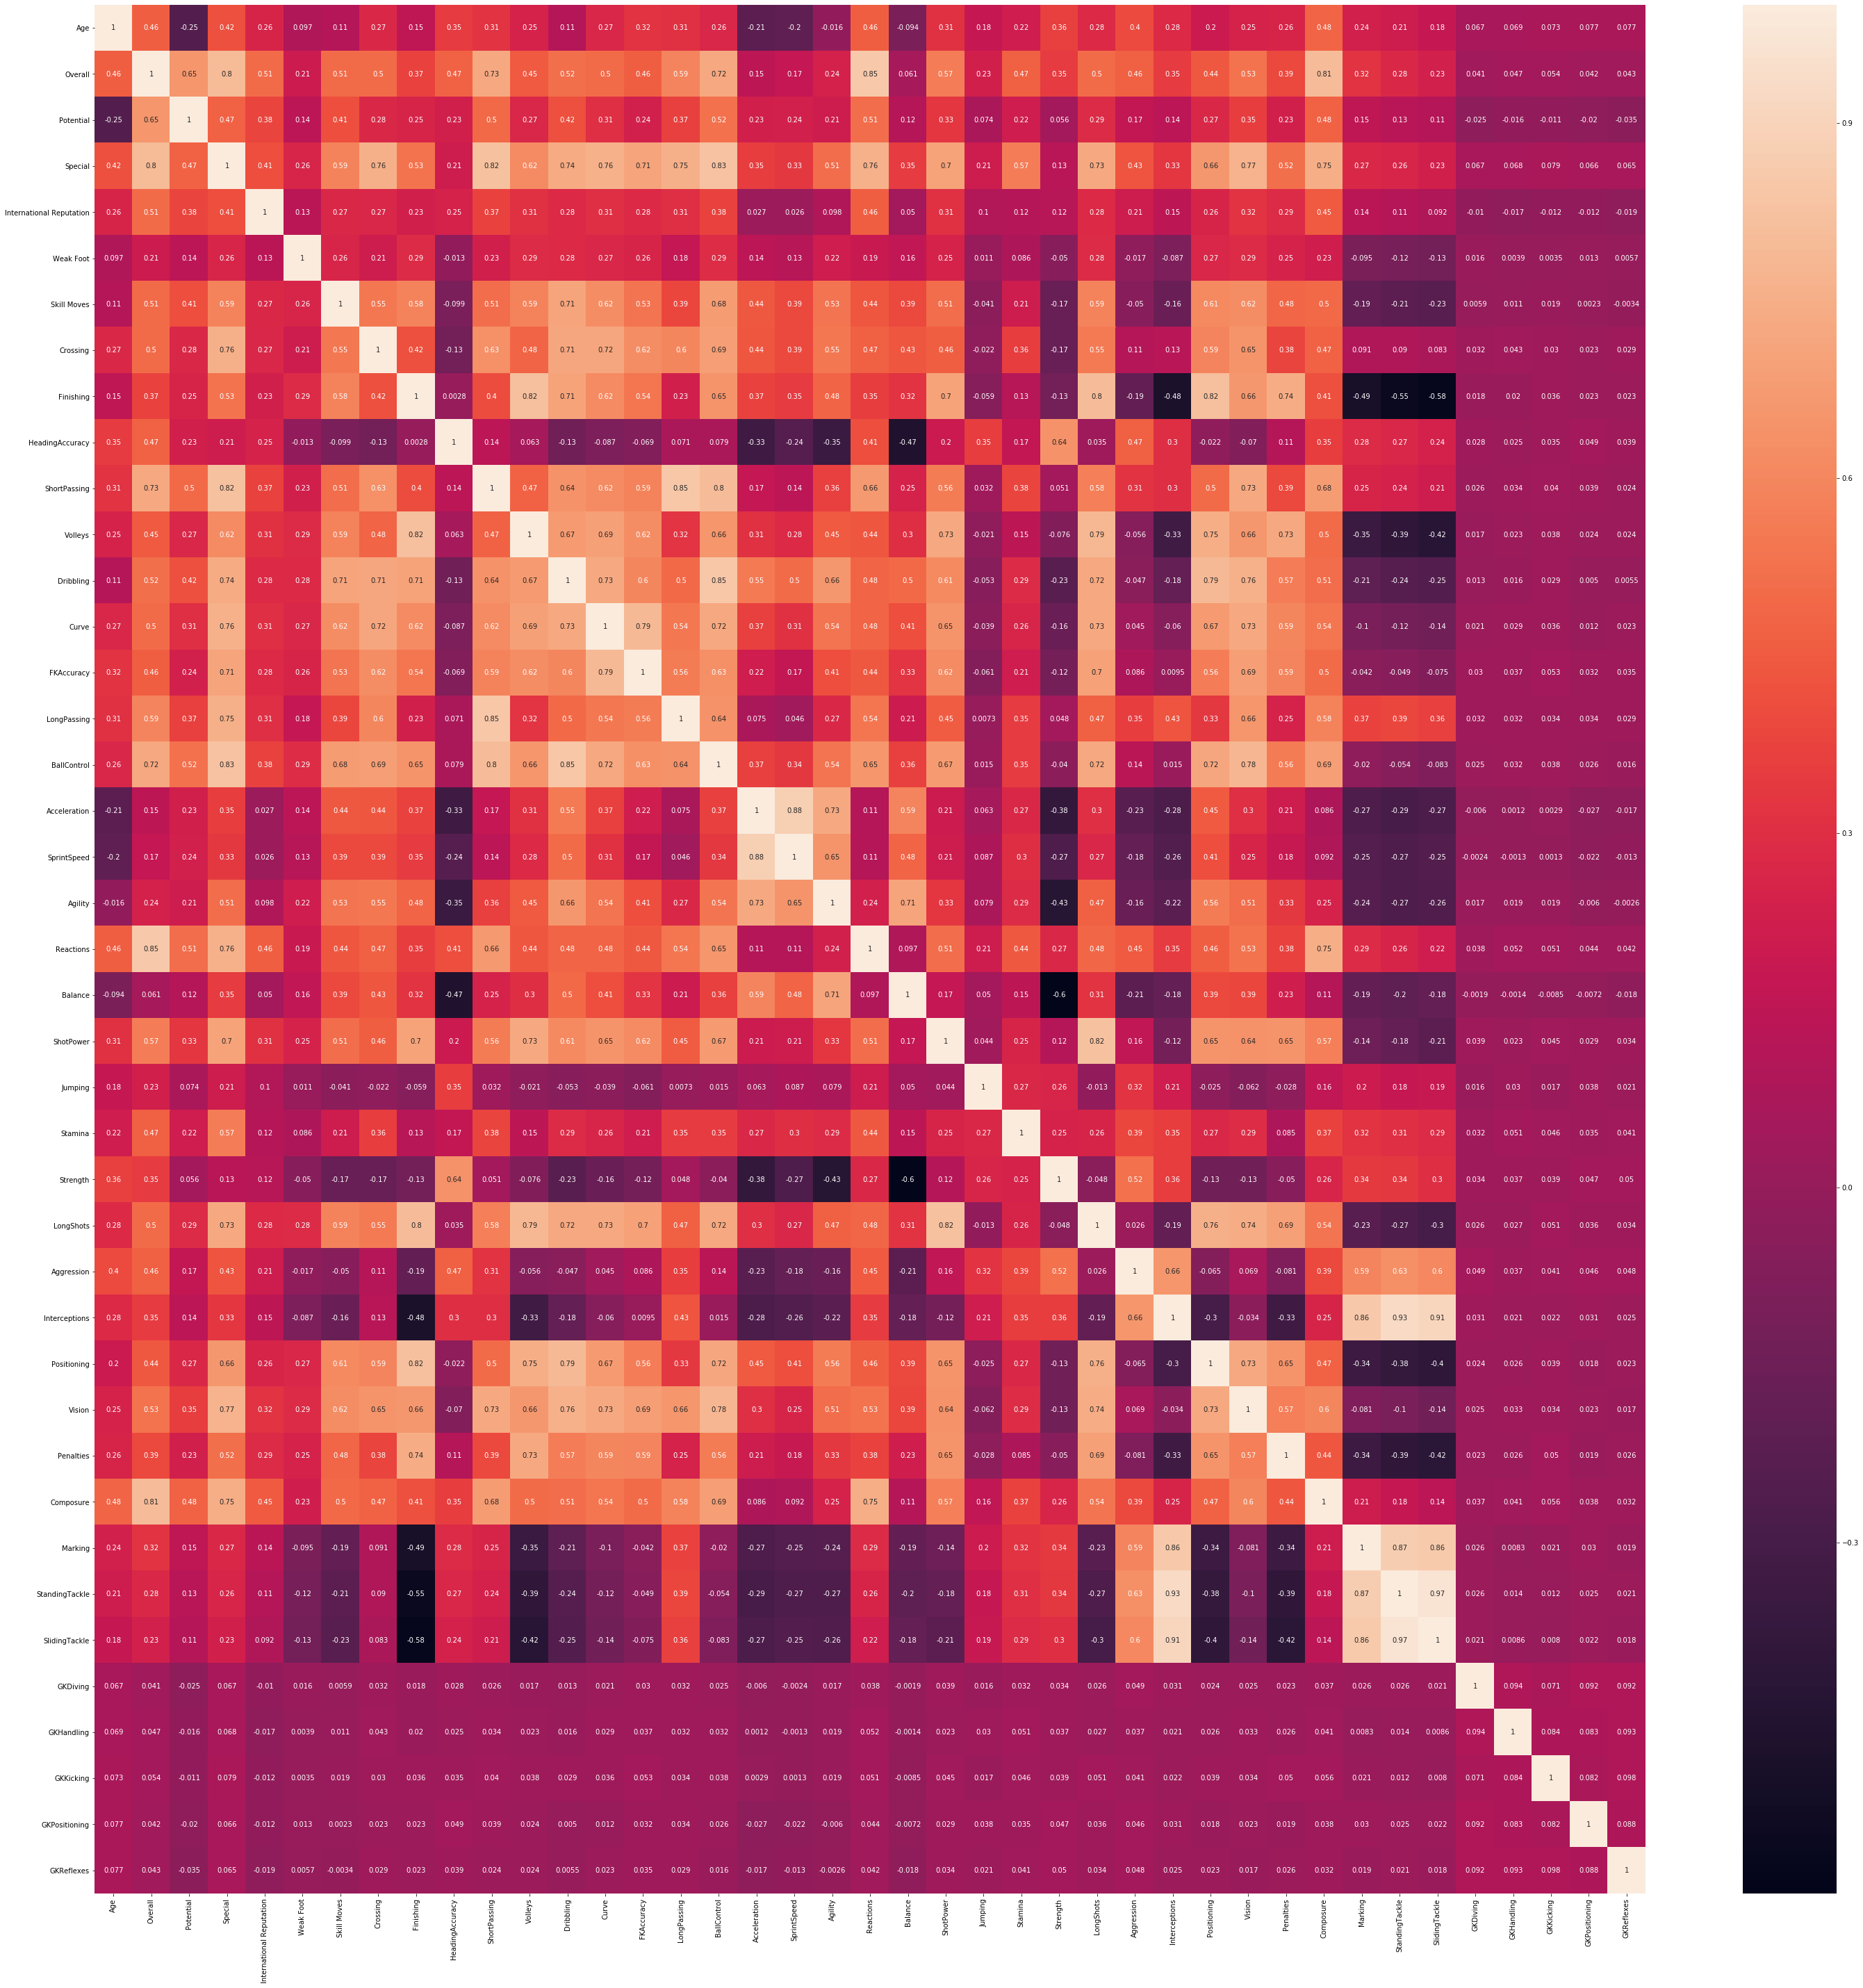

In [31]:
# Heat map 
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

### Step_8 : Implementing the results and running the model again

In [32]:
# Removing Columns having more value than.50 and less value corealtion from our dataset
X_train_new = X_train[['Age','Potential', 'Special','International Reputation', 'Skill Moves', 'Crossing',
       'Finishing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
X_test_new = X_test[['Age','Potential', 'Special','International Reputation', 'Skill Moves', 'Crossing',
       'Finishing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [33]:
# Model building
lr1.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Making Predictions
y_pred_new = lr1.predict(X_test_new)

In [35]:
# # Map for the Actual and Predicted
# c = [i for i in range(1,1000,1)]
# fig = plt.figure()
# plt.plot(c,y_test,color="blue", linewidth=2.5, linestyle=' ')
# plt.plot(c,y_pred,color='red', linewidth=2.5, linestyle= ' ')
# fig.suptitle('Actual and Predicted', fontsize=20)
# plt.xlabel("Actual", fontsize=20)
# plt.ylabel("Predicted", fontsize=18)

In [36]:
# # Error terms
# c = [i for i in range(1,61,1)]
# fig = plt.figure()
# plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
# fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
# plt.xlabel('Index', fontsize=18)                      # X-label
# plt.ylabel('ytest-ypred', fontsize=16)      

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred_new)
r_squared = r2_score(y_test,y_pred_new)

In [38]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.2368699616740457
r_square_value : 0.9304657764706632


In [39]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3737.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:57:07   Log-Likelihood:                -20837.
No. Observations:               10325   AIC:                         4.175e+04
Df Residuals:                   10287   BIC:                         4.203e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Model Refinement Using RFE


##### The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [40]:
from sklearn.feature_selection import RFE

In [41]:
rfe = RFE(lr1,2)

In [42]:
rfe = rfe.fit(X_train, y_train)

In [43]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ 1  2 19  5 34  1 25 31 39 38 17 10 16 12 23  6 32 36 21  3  8 29 24 35
 37 11 20  9 18  7 15  4 28 30 14 26 27 22 13 33]


## After Excluding the colinear point

In [44]:
# after excluding collinear properties I got these features
# for those of whom this and previous steps are confusing I suggest reading about collinearity 
regModel = df[['Overall', 'Strength', 'Stamina', 'Jumping', 'Composure', 'Reactions', 'ShortPassing', 'GKKicking']]

In [45]:
regModel.corr()["Overall"].sort_values(ascending=False).head(12)

# here I explain features:
# Reactions: measures how quickly a player responds to a situation happening around him. 
# It has nothing to do with the player’s speed.


# Composure: this attribute determines at what distance the player 
# with the ball starts feeling the pressure from the opponent. 
# This then affects the chances of the player making an error when he shoots, 
# passes and crosses.

Overall         1.000000
Reactions       0.851576
Composure       0.806372
ShortPassing    0.726746
Stamina         0.467991
Strength        0.348397
Jumping         0.230778
GKKicking       0.054034
Name: Overall, dtype: float64

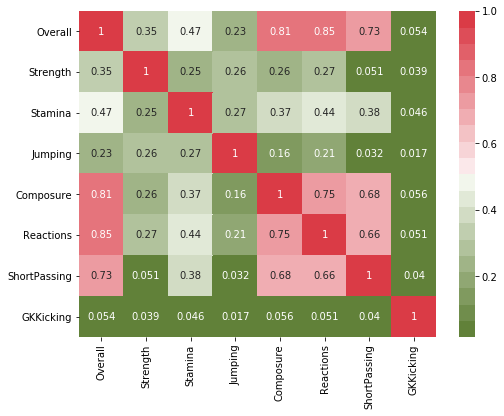

In [46]:
# last time checking to avoid collinearity
plt.figure(figsize=(8,6))
sns.heatmap(regModel.corr(), cmap=sns.diverging_palette(110, 10, n=20), annot=True)
plt.show()

In [47]:
# assign x and y
X = regModel[['Strength', 'Stamina', 'Jumping', 'Composure', 'Reactions', 'ShortPassing', 'GKKicking']]
y = regModel['Overall']

In [48]:
# Spliting the Data in X and Y
from sklearn.model_selection import train_test_split

In [49]:
# spliting variables into train and test, setting test_size and random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# instantiate LinearRegression model and assign it to 'lm'
lm=LinearRegression

In [52]:
# fitting my training data to the model
lm1=LinearRegression().fit(X_train, y_train)

## Model Evaluation


In [53]:
# here I'm creating dataframe from my model coefficients
coefs = pd.DataFrame(lm1.coef_,X_train.columns, columns=['Coefficients'])

In [54]:
print(f'rSquared: {round(lm1.score(X_train, y_train), 3)}')
coefs
# rSquared is a metric which describe how good is your model.
# coefficients interpretation: if you hold other features fixed and increase 'Reactions'
# in one unit you get increase in 'Overall' by 0.340

rSquared: 0.829


,Coefficients
Strength,0.067518
Stamina,0.028490
Jumping,0.026851
Composure,0.177324
Reactions,0.340781
ShortPassing,0.160258
GKKicking,0.001145


# Model Predicions

In [55]:
# in order to get predicions I input 'X_test' values to the model's predict method 
# and assign to the variable 'predictions'
predictions = lm1.predict(X_test)

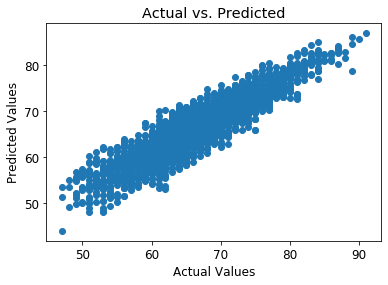

In [56]:
# plot actual vs. predicted values
plt.rcParams.update({'font.size':12})
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, predictions)
plt.show()

In [57]:
from sklearn import metrics

Root Mean squared Error: 2.861


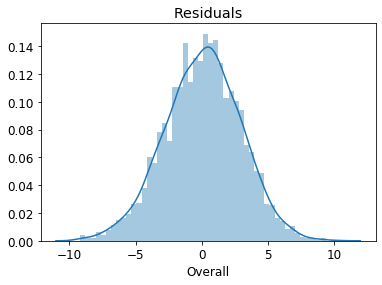

In [58]:
# here I use a metric (Root Mean Squared Error) which represents difference between real and predicted values.
# this difference is expressed in the same units as predicted value (in this case 'Overall')
# other way to test your model is to plot residuals distribution. If it visually seems normally distributed and mean around 0 
# it indicates that your model is the right decision for this data
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print(f"Root Mean squared Error: {round(rmse,3)}")
plt.title('Residuals')
sns.distplot((y_test-predictions),bins=50)
plt.show()

# 2. How accurately can we tell the position of the player just knowing physical and technical features of a player?

## KNN Classification

In [59]:
# creating separate dataframe with "Position" column
features = df[['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Position']]

In [60]:
# cheching for null values
features.isnull().sum().head()

Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
dtype: int64

In [61]:
features.Position.nunique()

26

In [62]:
# How to get the unique value
pd.unique(features['Position'].values.ravel('K'))

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW', 'CM',
       'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [63]:
# function which changes position from goolkeeper to 1, defender to 2, midfielder to 3, striker to 4.
def simplePosition(col):
    if (col == 'GK'):
        return 1
    elif ((col == 'RB') | (col == 'LB') | (col == 'CB') | (col == 'LCB') | (col == 'RCB') | (col == 'RWB') | (col == 'LWB') ):
        return 2
    elif ((col == 'LDM') | (col == 'CDM') | (col == 'RDM') | (col == 'LM') | (col == 'LCM') | 
          (col == 'CM') | (col == 'RCM') | (col == 'RM') | (col == 'LAM') | (col == 'CAM') | 
          (col == 'RAM') | (col == 'LW') | (col == 'RW')):
        return 3
    elif ((col == 'RS') | (col == 'ST') | (col == 'LS') | (col == 'CF') | (col == 'LF') | (col == 'RF')):
        return 4
    else:
        return 'error'

In [64]:
# applying that funcion to position column
features["Position"] = features.Position.apply(simplePosition)

In [65]:
features.Position.unique()

array([4, 3, 2], dtype=int64)

In [66]:
features.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,4
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3
5,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,4


## Scaling 


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
# Fitting the data to a Scaler object  except  position column
scaler.fit(features.drop('Position', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
# Perform Actual Scaling
scaled_fetures = scaler.transform(features.drop('Position', axis=1))

In [71]:
# and now we have dataframe with scaled features
df_features= pd.DataFrame(scaled_fetures, columns=features.columns[:-1])

In [72]:
from sklearn.model_selection import train_test_split

In [78]:
# assign scaled features dataframe and position column to the varibles.
feat = df_features
targ = features.Position
# spliting data into train and test
xtrain,xtest,ytrain,ytest= train_test_split(feat,targ,test_size=.2,random_state=42)

# Import the module KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)

In [81]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Model Evaluation

In [82]:
pred = knn.predict(xtest)

In [83]:
# Check the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
# confusion matrix and classification report explains how good our classification algorith performs
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))

[[ 902  167    1]
 [ 124 1179  108]
 [   2  108  360]]


              precision    recall  f1-score   support

           2       0.88      0.84      0.86      1070
           3       0.81      0.84      0.82      1411
           4       0.77      0.77      0.77       470

    accuracy                           0.83      2951
   macro avg       0.82      0.81      0.82      2951
weighted avg       0.83      0.83      0.83      2951



In [86]:
confMatrix = confusion_matrix(ytest, pred)

In [87]:
# this function plots good looking confusion matrix, accuracy and error rates. 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

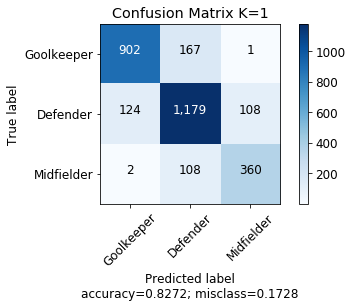

In [89]:
# here is same, but a bit better looking confusion matrix 
plot_confusion_matrix(cm = confMatrix, normalize = False, 
                      target_names = ['Goolkeeper', 'Defender', 'Midfielder'],
                      title= "Confusion Matrix K=1")

In [91]:
# here I am looping through same classification algorithm with different n_neighbors values
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

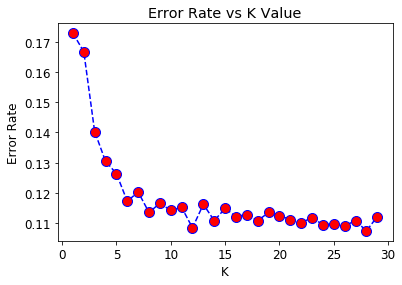

In [92]:
# error rate for different number neighbors (K)
# as we can see around 8 or 9 neighbors error rate reach plateau
plt.plot(range(1,30),error_rate,color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [96]:
# rerun classification algorith with n_neighbors where error rate was smallest
# it is always better to choose odd number of neighbors
Knn = KNeighborsClassifier(n_neighbors=9)
Knn.fit(xtrain, ytrain)
pred_9 = Knn.predict(xtest)
print(confusion_matrix(ytest, pred_9))
print('\n')
print(classification_report(ytest, pred_9))

[[ 955  114    1]
 [  78 1271   62]
 [   4   85  381]]


              precision    recall  f1-score   support

           2       0.92      0.89      0.91      1070
           3       0.86      0.90      0.88      1411
           4       0.86      0.81      0.83       470

    accuracy                           0.88      2951
   macro avg       0.88      0.87      0.87      2951
weighted avg       0.88      0.88      0.88      2951



In [97]:
conf9Matrix = confusion_matrix(ytest, pred_9)

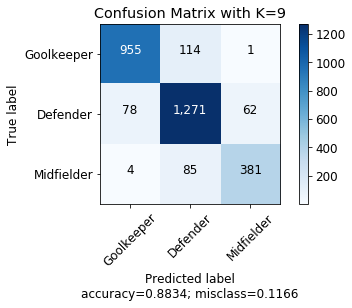

In [99]:
# model prediction improved from ~86% to ~90%
plot_confusion_matrix(cm = conf9Matrix, normalize = False, 
                      target_names = ['Goolkeeper', 'Defender', 'Midfielder'],
                      title = "Confusion Matrix with K=9")

# Conclusion Accuracy has Increased 82  to 88 percent